# 多层感知机

### 真正的深度网络来力，其中最简单的就是多层感知机
#### 多层感知机由多层神经元组成， 每一层与它的上一层相连，从中接收输入； 
#### 同时每一层也与它的下一层相连，影响当前层的神经元

## 4.1. 多层感知机

### 4.1.1. 隐藏层

#### 仿射变换中的线性是一个很强的假设

### 4.1.1.1. 线性模型可能会出错

#### 然而我们可以很容易找出违反单调性的例子
#### 例如，我们想要根据体温预测死亡率
#### 对体温高于37摄氏度的人来说，温度越高风险越大。 然而，对体温低于37摄氏度的人来说，温度越高风险就越低
#### 在这种情况下，我们也可以通过一些巧妙的预处理来解决问题如将体温与37度的距离设为特征

#### 我们的数据可能会有一种考虑到特征间相互作用的表示，在此基础上建立线性模型是合适的
#### 对于深度神经网络，我们使用观测数据来联合学习隐藏层表示和应用于该表示的线性预测器

### 4.1.1.2. 在网络中加入隐藏层

#### 在网络中加入一或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系类型
#### 最简单的方法就是将许多全连接层堆叠在一起
#### 每一层都输出到上面的层，直到生成最后的输出
####  我们可以把前$L-1$层看作表示，把最后一层看作线性预测器
#### 这种架构通常称为多层感知机（multilayer perceptron），MLP

#### <img src="https://zh.d2l.ai/_images/mlp.svg" alt="一个单隐藏层的多层感知机，具有5个隐藏单元">

#### 这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元
#### 输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。 
#### 因此，这个多层感知机中的层数为2
#### 因为两个层是全连接的，所以输入会影响隐藏层中的每个神经元

#### 具有全连接层的多层感知机的参数开销可能会高得令人望而却步
#### 可能在参数节约和模型有效性之间进行权衡 (Zhang et al., 2021)

### 4.1.1.3. 从线性到非线性

#### 线性模型的局限性
##### 矩阵表示法：使用矩阵来表示具有多个特征的样本批次。
##### 单隐藏层的MLP：包含隐藏单元，以及隐藏层和输出层的权重和偏置。
##### 问题：如果没有非线性，增加隐藏层不会扩展模型的能力超越仿射函数。

#### 非线性的重要性
##### 仿射函数的限制：仅包含仿射变换的MLP本质上是线性的，限制了其表达能力。
##### 解决方案 - 激活函数：
在每个仿射变换后应用非线性激活函数。
这种方法确保MLP不能被简化为线性模型。
激活函数对每个元素操作，允许独立计算每个激活值。
构建复杂的MLP
##### 堆叠层：可以堆叠更多层（例如，...），以增强模型的表达能力。
##### 独立激活：每个激活值的计算不需要考虑其他隐藏单元的值，适用于大多数激活函数。

### 4.1.1.4. 通用近似定理

#### 设计隐藏节点来执行任意计算
#### 在一对输入上进行基本逻辑操作，多层感知机是通用近似器


### 4.1.2. 激活函数

#### 激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活
#### 将输入信号转换为输出的可微运算，大多数激活函数都是非线性的

In [2]:
%matplotlib inline
import torch
from fc import torch as fc

### 4.1.2.1. ReLU函数

#### 最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）
#### 因为它实现简单，同时在各种预测任务中表现良好
#### $$ \operatorname{ReLU}(x) = \max(x, 0).$$

#### 通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素

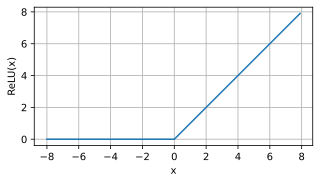

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
fc.plot(x.detach(), y.detach(), 'x', 'ReLU(x)', figsize=(5, 2.5))